In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("data/train.csv")

In [3]:
df.sample(10)

,Lat,Long_,Deaths,Case_Fatality_Ratio
3473,32.599142,-96.287347,NaN,1.322365
2797,39.560213,-83.456202,134.0,1.459854
2153,34.356879,-89.484910,187.0,1.016636
792,31.525090,-110.847909,NaN,1.247423
2660,35.367319,-78.872436,NaN,0.889929
3233,45.490495,-102.475559,19.0,2.402023
331,31.009484,130.430665,NaN,0.164702
720,32.159728,-86.651584,80.0,2.489885
1891,44.407596,-69.767385,NaN,0.995348
1536,43.356710,-92.317027,37.0,1.616426


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4016 entries, 0 to 4015
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lat                  3925 non-null   float64
 1   Long_                3925 non-null   float64
 2   Deaths               2458 non-null   float64
 3   Case_Fatality_Ratio  3972 non-null   float64
dtypes: float64(4)
memory usage: 125.6 KB


In [5]:
df.isnull().sum()

Lat                      91
Long_                    91
Deaths                 1558
Case_Fatality_Ratio      44
dtype: int64

- For the Lat and the Long_ , 91 data points were missing.
- So it has to be removed since the future analysis has to take the coordinates and also their missing quantities were roughly $2%$
- For the CFR vales, the missing values were merely $1%$ of the total values present in the table  
- But for the <b>Deaths</b> , they had a significant missing values which were around $40%$ of the data, so it is better to fill the NaN values with 0, since the NaN meant to be empty, which signifies <b>no death</b>

In [6]:
df

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.939110,67.709953,NaN,3.779217
1,41.153300,20.168300,NaN,1.077234
2,28.033900,1.659600,NaN,2.536905
3,42.506300,1.521800,165.0,0.345543
4,-11.202700,17.873900,NaN,1.836434
...,...,...,...,...
4011,31.952200,35.233200,NaN,0.811686
4012,39.904200,116.407400,0.0,0.000000
4013,15.552727,48.516388,NaN,18.074508
4014,-13.133897,27.849332,NaN,1.201603


In [7]:
df.dropna(subset=['Lat', 'Long_', 'Case_Fatality_Ratio'], axis=0)

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.939110,67.709953,NaN,3.779217
1,41.153300,20.168300,NaN,1.077234
2,28.033900,1.659600,NaN,2.536905
3,42.506300,1.521800,165.0,0.345543
4,-11.202700,17.873900,NaN,1.836434
...,...,...,...,...
4011,31.952200,35.233200,NaN,0.811686
4012,39.904200,116.407400,0.0,0.000000
4013,15.552727,48.516388,NaN,18.074508
4014,-13.133897,27.849332,NaN,1.201603


In [17]:
new_df = df.copy(deep=True)

In [18]:
new_df

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.939110,67.709953,NaN,3.779217
1,41.153300,20.168300,NaN,1.077234
2,28.033900,1.659600,NaN,2.536905
3,42.506300,1.521800,165.0,0.345543
4,-11.202700,17.873900,NaN,1.836434
...,...,...,...,...
4011,31.952200,35.233200,NaN,0.811686
4012,39.904200,116.407400,0.0,0.000000
4013,15.552727,48.516388,NaN,18.074508
4014,-13.133897,27.849332,NaN,1.201603


In [19]:
new_df.dropna(subset=['Lat', 'Long_', 'Case_Fatality_Ratio'], axis=0 , inplace=True)

In [20]:
new_df

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.939110,67.709953,NaN,3.779217
1,41.153300,20.168300,NaN,1.077234
2,28.033900,1.659600,NaN,2.536905
3,42.506300,1.521800,165.0,0.345543
4,-11.202700,17.873900,NaN,1.836434
...,...,...,...,...
4011,31.952200,35.233200,NaN,0.811686
4012,39.904200,116.407400,0.0,0.000000
4013,15.552727,48.516388,NaN,18.074508
4014,-13.133897,27.849332,NaN,1.201603


In [23]:
new_df.isnull().sum()

Lat                       0
Long_                     0
Deaths                 1546
Case_Fatality_Ratio       0
dtype: int64

In [29]:
new_df.fillna({'Deaths': 0}, inplace=True)

In [30]:
new_df['Deaths'] = new_df['Deaths'].astype(int)
new_df

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.939110,67.709953,0,3.779217
1,41.153300,20.168300,0,1.077234
2,28.033900,1.659600,0,2.536905
3,42.506300,1.521800,165,0.345543
4,-11.202700,17.873900,0,1.836434
...,...,...,...,...
4011,31.952200,35.233200,0,0.811686
4012,39.904200,116.407400,0,0.000000
4013,15.552727,48.516388,0,18.074508
4014,-13.133897,27.849332,0,1.201603


In [31]:
new_df.isnull().sum()

Lat                    0
Long_                  0
Deaths                 0
Case_Fatality_Ratio    0
dtype: int64

### Here the missing values have been taken care of
- The Lat, Long_ and the Case_Fatality_Rate have been removed 
- The Deaths with NaN have been set to 0 

In [32]:
new_df

,Lat,Long_,Deaths,Case_Fatality_Ratio
0,33.939110,67.709953,0,3.779217
1,41.153300,20.168300,0,1.077234
2,28.033900,1.659600,0,2.536905
3,42.506300,1.521800,165,0.345543
4,-11.202700,17.873900,0,1.836434
...,...,...,...,...
4011,31.952200,35.233200,0,0.811686
4012,39.904200,116.407400,0,0.000000
4013,15.552727,48.516388,0,18.074508
4014,-13.133897,27.849332,0,1.201603


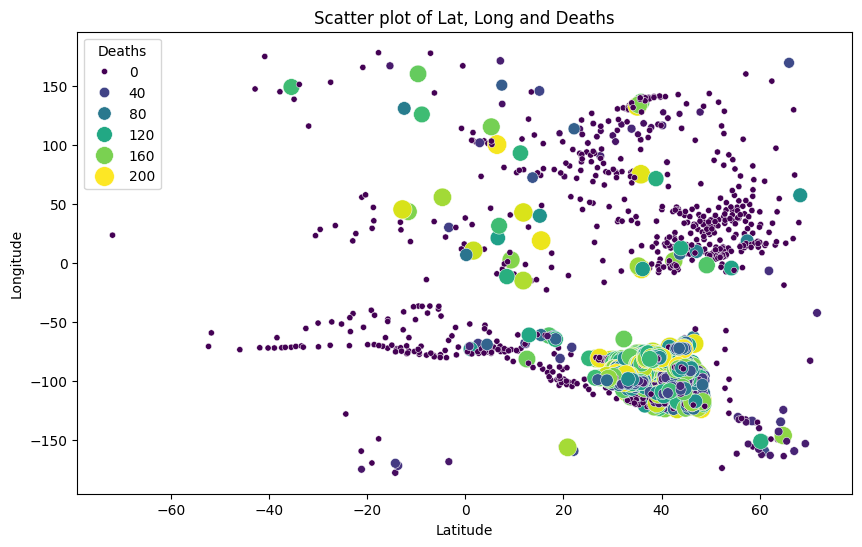

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_df, x='Lat', y='Long_', size='Deaths', hue='Deaths', palette='viridis', legend=True, sizes=(20, 200))
plt.title('Scatter plot of Lat, Long and Deaths')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()